In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import yfinance as yf
import seaborn as sns
import datetime
import statsmodels.api as sm

## The objective of this analysis is to answer some of the following questions:
- What was the annualized return and annualize volatility of the different assets since 2015 to this date.
- Visually check volatility of the assets, what can we see.
- What is the distribution of the returns of Tesla
- What is the correlation of the assets
- What was the beta and alpha of Tesla

In [3]:
# get the default parameters for plotting in matplotlib in case i want to go back
# IPython_default = plt.rcParams.copy()

In [4]:
stocks_list = ['SPY', 'TSLA', 'AMD', 'ATVI', 'BRK-B', 'ACHC', 'LPI', 'DHI', 'V']

In [5]:
# get final day to extract the data from yfinance
end_date = datetime.date.today() - datetime.timedelta(days=3)
end_date

datetime.date(2022, 7, 2)

In [6]:
assets = yf.download(stocks_list, start='2015-01-01', end = end_date)['Adj Close']

[*********************100%***********************]  9 of 9 completed


In [7]:
assets.head()

,ACHC,AMD,ATVI,BRK-B,DHI,LPI,SPY,TSLA,V
Date,,,,,,,,,
2015-01-02,59.980000,2.67,19.055655,149.169998,22.905443,218.000000,179.010849,43.862000,62.994781
2015-01-05,59.119999,2.66,18.790598,147.000000,22.428246,187.399994,175.777985,42.018002,61.604263
2015-01-06,58.189999,2.63,18.440342,146.839996,22.125418,168.399994,174.122330,42.256001,61.207310
2015-01-07,60.630001,2.58,18.042757,148.880005,23.263344,166.199997,176.292068,42.189999,62.027359
2015-01-08,61.759998,2.61,18.222620,151.369995,23.795609,180.600006,179.420410,42.124001,62.859314


## Returns

In [8]:
assets_returns = assets.pct_change().dropna()
assets_returns

,ACHC,AMD,ATVI,BRK-B,DHI,LPI,SPY,TSLA,V
Date,,,,,,,,,
2015-01-05,-0.014338,-0.003745,-0.013910,-0.014547,-0.020833,-0.140367,-0.018060,-0.042041,-0.022074
2015-01-06,-0.015731,-0.011278,-0.018640,-0.001088,-0.013502,-0.101387,-0.009419,0.005664,-0.006444
2015-01-07,0.041932,-0.019011,-0.021561,0.013893,0.051431,-0.013064,0.012461,-0.001562,0.013398
2015-01-08,0.018638,0.011628,0.009969,0.016725,0.022880,0.086643,0.017745,-0.001564,0.013413
2015-01-09,0.000162,0.007663,-0.018182,-0.012552,0.005013,0.040974,-0.008014,-0.018802,-0.014823
...,...,...,...,...,...,...,...,...,...
2022-06-27,-0.005684,-0.010565,0.000898,0.000431,0.004136,0.055463,-0.003820,-0.003202,-0.009489
2022-06-28,-0.013148,-0.062442,-0.010896,-0.016308,-0.030749,0.052943,-0.020433,-0.050044,-0.026724
2022-06-29,0.016655,-0.034538,0.010368,-0.001351,0.001973,-0.078603,-0.000814,-0.017937,0.006966


In [9]:
assets_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1887 entries, 2015-01-05 to 2022-07-01
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACHC    1887 non-null   float64
 1   AMD     1887 non-null   float64
 2   ATVI    1887 non-null   float64
 3   BRK-B   1887 non-null   float64
 4   DHI     1887 non-null   float64
 5   LPI     1887 non-null   float64
 6   SPY     1887 non-null   float64
 7   TSLA    1887 non-null   float64
 8   V       1887 non-null   float64
dtypes: float64(9)
memory usage: 147.4 KB


<AxesSubplot:xlabel='Date'>

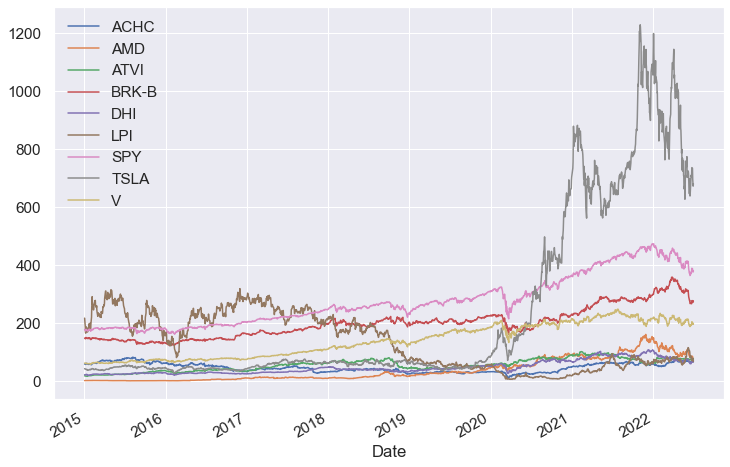

In [97]:
sns.color_palette("Paired")
assets.plot(figsize=(12, 8))

As we can see the best performing stock since 2015 in terms of prices was Tesla, outperforming the SPY (S&P 500).
We should normalize the prices so there are all in the same scale.

#### Normalizing time series to a base value (100)

In [11]:
close_prices_normalized = (assets / assets.iloc[0]) * 100

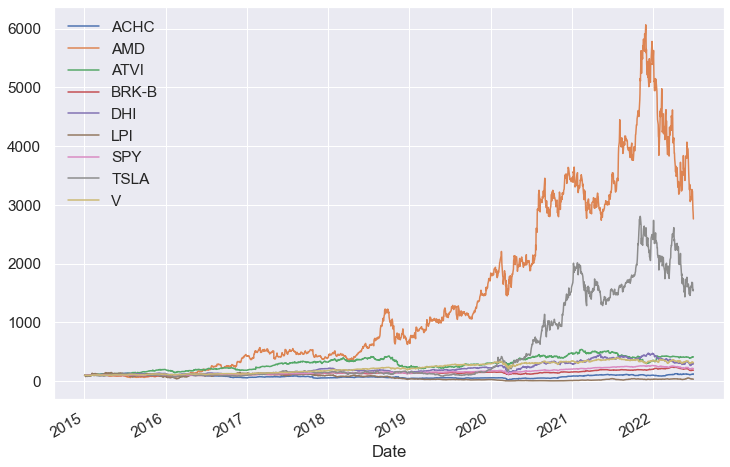

In [98]:
close_prices_normalized.plot(figsize=(12, 8));

Take a look at Tesla and AMD, they move almost the same way, i assume their correlation will be almost close to 1.

### Lets calculted log returns and visualize the returns.

In [13]:
log_returns = np.log(assets_returns + 1)
log_returns.head()

,ACHC,AMD,ATVI,BRK-B,DHI,LPI,SPY,TSLA,V
Date,,,,,,,,,
2015-01-05,-0.014442,-0.003752,-0.014007,-0.014654,-0.021053,-0.151250,-0.018225,-0.042950,-0.022321
2015-01-06,-0.015856,-0.011342,-0.018816,-0.001089,-0.013594,-0.106903,-0.009464,0.005648,-0.006464
2015-01-07,0.041076,-0.019195,-0.021796,0.013797,0.050152,-0.013150,0.012384,-0.001563,0.013309
2015-01-08,0.018466,0.011561,0.009919,0.016586,0.022622,0.083093,0.017590,-0.001566,0.013324
2015-01-09,0.000162,0.007634,-0.018349,-0.012631,0.005001,0.040157,-0.008046,-0.018981,-0.014934


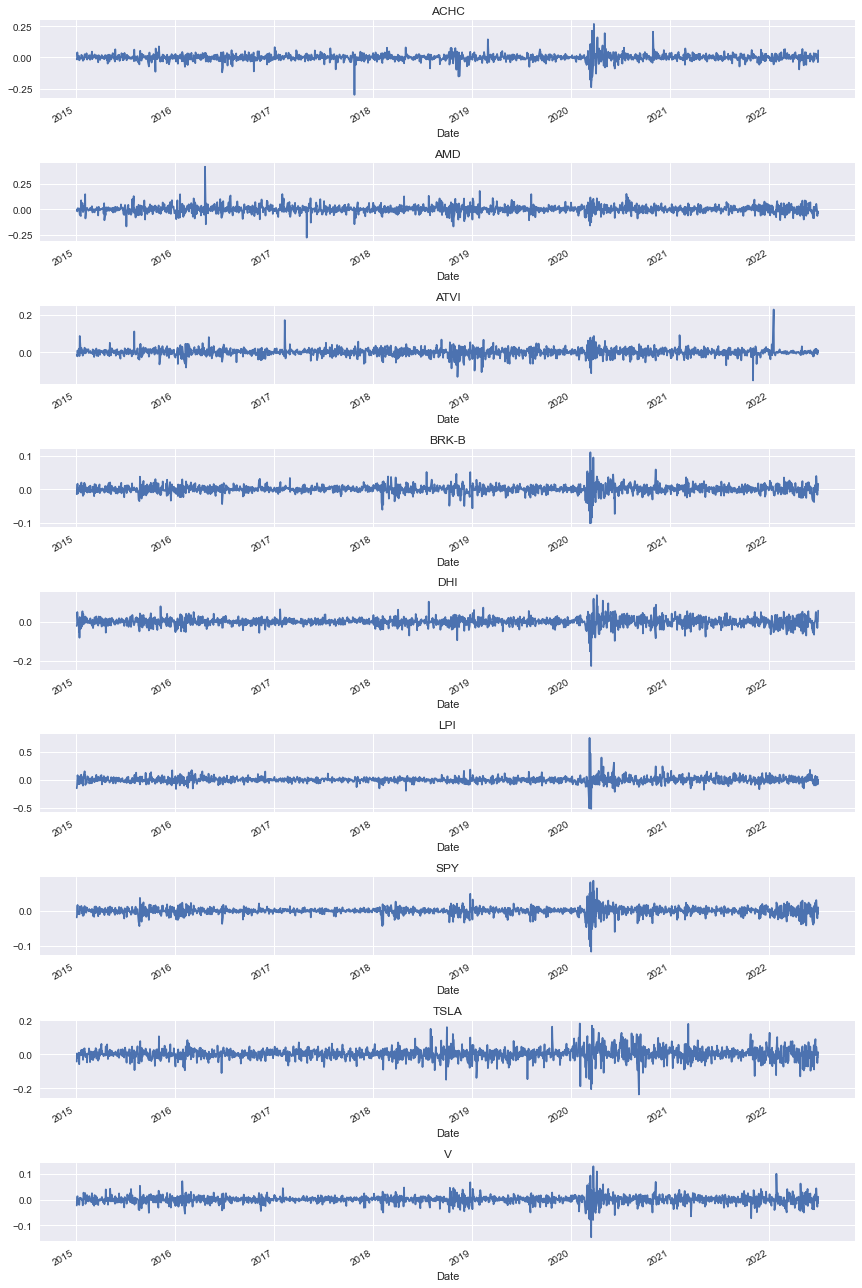

In [14]:
for i, symbol in enumerate(log_returns.columns):
    plt.subplot(len(log_returns.columns), 1, i + 1)
    plt.title(symbol)
    log_returns[symbol].plot(figsize=(12, 18))
                                  
plt.tight_layout()
plt.show();

Some observations:
- hight volatility in all the assets in 2020
- TSLA has a lot of noise, a lot of volatility.
- Laredo Petroleum (LPI) until 2020 was not so volatile

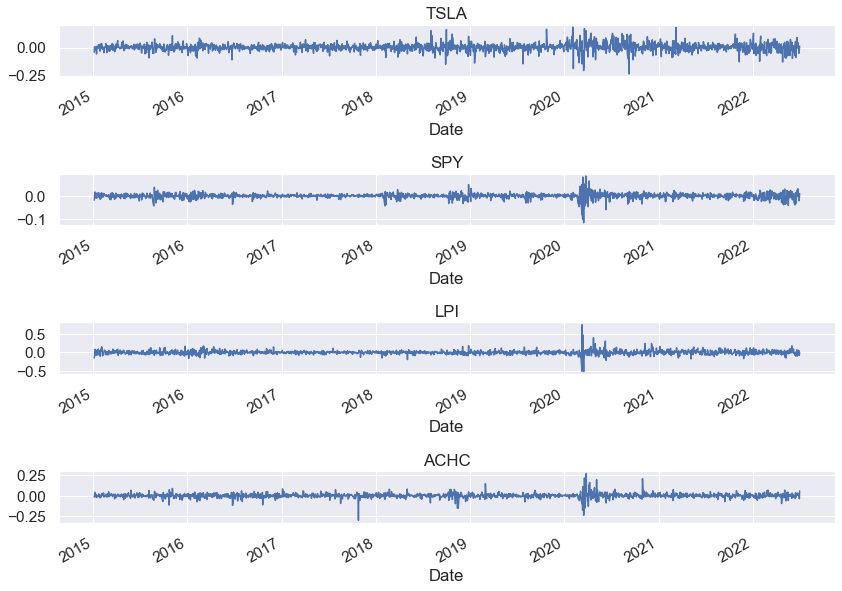

In [90]:
for i, symbol in enumerate(log_returns[['TSLA', 'SPY', 'LPI', 'ACHC']].columns):
    plt.subplot(len(log_returns.columns), 1, i + 1)
    plt.title(symbol)
    log_returns[symbol].plot(figsize=(12, 18))
                                  
plt.tight_layout()
plt.show();

<AxesSubplot:xlabel='Date'>

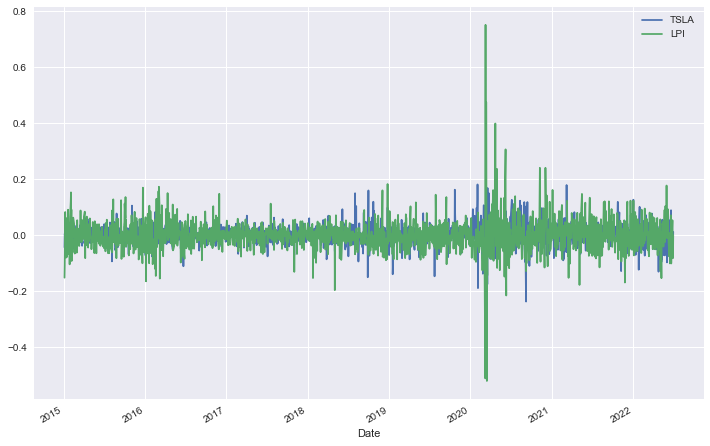

In [15]:
log_returns[['TSLA', 'LPI']].plot(figsize=(12, 8))

Calculating the annualized and volatilty of the assets

In [16]:
annualized_vol = log_returns.std() * np.sqrt(252)
annualized_returns = log_returns.mean() * 252

In [17]:
log_returns.describe().T.loc[:, ['mean', 'std']]

,mean,std
ACHC,0.000094,0.029437
AMD,0.001758,0.038008
ATVI,0.000751,0.021227
BRK-B,0.000329,0.012765
DHI,0.000593,0.022552
LPI,-0.000610,0.057378
SPY,0.000401,0.011566
TSLA,0.001454,0.035482
V,0.000610,0.016457


In [18]:
summary = log_returns.describe().T.loc[:, ['mean', 'std']]
summary['mean'] = summary['mean'] * 252
summary['std'] = summary['std'] * np.sqrt(252)
summary

,mean,std
ACHC,0.023611,0.467302
AMD,0.443039,0.603360
ATVI,0.189184,0.336973
BRK-B,0.082896,0.202636
DHI,0.149358,0.358004
LPI,-0.153842,0.910840
SPY,0.100958,0.183601
TSLA,0.366405,0.563254
V,0.153732,0.261246


In [19]:
# more friendly view
mean_summary = summary['mean'].astype(float).map("{:.2%}".format).to_frame()
mean_summary.rename(columns={'mean': 'annulized mean Return'}, inplace=True)
mean_summary

,annulized mean Return
ACHC,2.36%
AMD,44.30%
ATVI,18.92%
BRK-B,8.29%
DHI,14.94%
LPI,-15.38%
SPY,10.10%
TSLA,36.64%
V,15.37%


In [20]:
std_summary = summary['std'].astype(float).map("{:.2%}".format).to_frame()
std_summary.rename(columns={'std': 'Risk(std)'}, inplace=True)
std_summary

,Risk(std)
ACHC,46.73%
AMD,60.34%
ATVI,33.70%
BRK-B,20.26%
DHI,35.80%
LPI,91.08%
SPY,18.36%
TSLA,56.33%
V,26.12%


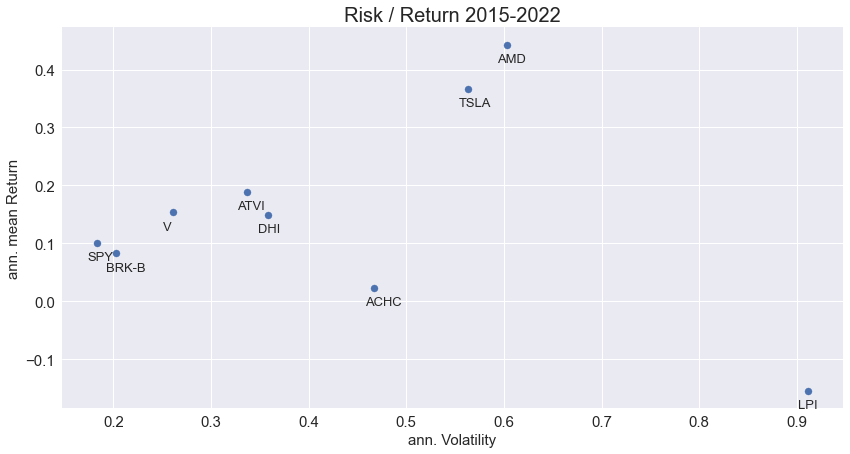

In [21]:
summary.plot.scatter(x='std', y='mean', figsize=(14, 7), s=50, fontsize=15)

for i in summary.index:
        plt.annotate(i, xy=(summary.loc[i, 'std']-0.01, summary.loc[i, 'mean']-0.03), size=13)
#     else:
#         plt.annotate(i, xy=(summary.loc[i, 'std'], summary.loc[i, 'mean']+0.003), size=13)
    
    
plt.xlabel('ann. Volatility', fontsize=15)
plt.ylabel('ann. mean Return', fontsize=15)
plt.title('Risk / Return 2015-2022', fontsize=20)

plt.show();

### Normal Distribution

<AxesSubplot:>

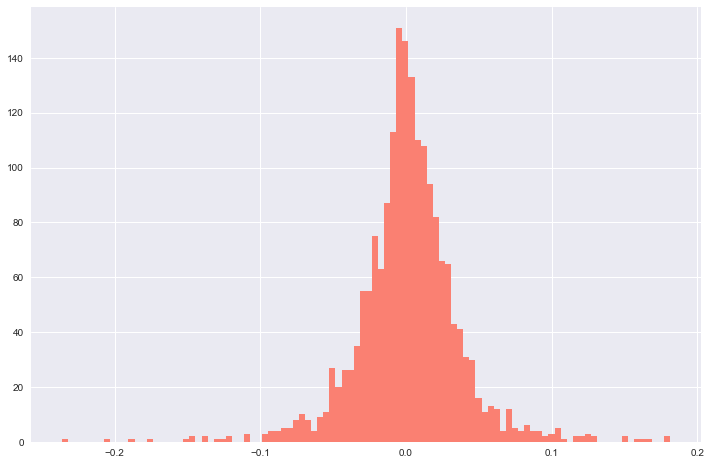

In [22]:
log_returns['TSLA'].hist(bins=100, figsize=(12, 8), color='salmon')

We can see that there is a lot of tails in the distribution of Tesla.

In [23]:
from scipy.stats import norm

In [24]:
x_list = np.linspace(log_returns['TSLA'].min(), log_returns['TSLA'].max(), 100)

In [25]:
y_list = norm.pdf(x_list,loc=log_returns['TSLA'].mean(), scale=log_returns['TSLA'].std())

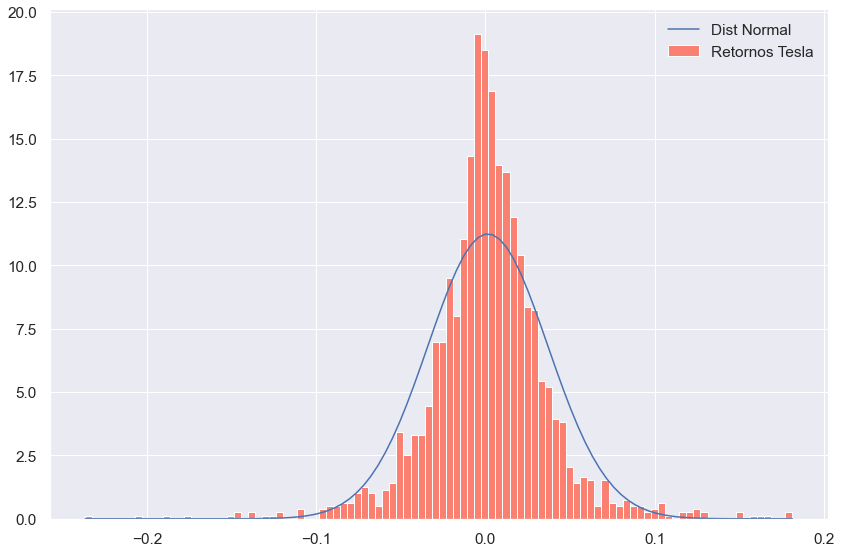

In [93]:
plt.plot(x_list, y_list, label='Dist Normal')
log_returns['TSLA'].hist(bins=100, density=True, figsize=(12, 8), color='salmon', label='Retornos Tesla')

plt.legend()
plt.tight_layout()
plt.show()

In [27]:
from scipy.stats import probplot

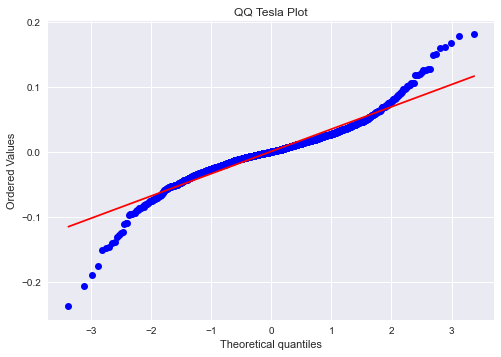

In [35]:
probplot(log_returns['TSLA'], dist='norm', fit=True, plot=plt)

plt.title('QQ Tesla Plot')
plt.show();

### t - distribution

In [29]:
from scipy.stats import t

In [30]:
params = t.fit(log_returns['TSLA'])
params

(2.946634214573412, 0.0015282641754235464, 0.022234393851708445)

In [31]:
# degrees of freedom , location, scale
df, loc, scale = params

In [32]:
ylist = t.pdf(x_list, df, loc, scale)

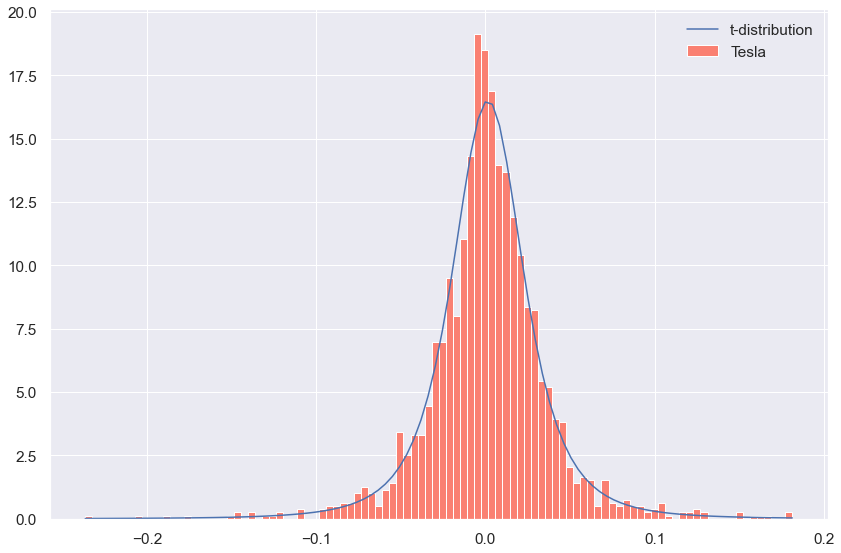

In [95]:
fig = plt.figure(figsize=(12, 8))

plt.plot(x_list, ylist, label='t-distribution')
log_returns['TSLA'].hist(bins=100, density=True, label='Tesla', color='salmon')

plt.legend()
plt.tight_layout()
plt.show();

 #### The t-distribution better fit than the normal distribution

In [34]:
sm.qqplot(log_returns['TSLA'], dist=t, line='s');

TypeError: %s requires more parameters to compute ppf

In [36]:
# fix the error
class Myt:
    def __init__(self, df):
        self.df = df
        
    def fit(self, x):
        return t.fit(x)
    
    def ppf(self, x, loc=0, scale=1):
        return t.ppf(x, self.df, loc, scale)        

<Figure size 864x576 with 0 Axes>

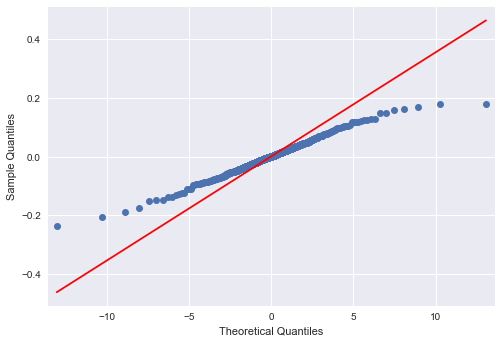

In [37]:
fig = plt.figure(figsize=(12, 8))

fig = sm.qqplot(log_returns['TSLA'], dist=Myt(df), line='s')

## Skewness and Kurtosis

In [38]:
tsla = log_returns['TSLA']

In [39]:
tails = pd.DataFrame({'Skew': tsla.skew(), 
                     'Kurtosis': tsla.kurtosis()}, index=[0])
tails.head()

,Skew,Kurtosis
0,-0.148317,5.228299


#### In both cases 
    Skew negative , slightly right tail more likely to get positive values
    Kurtosis grater than 0, more heavy tail than normal distribution, expect extreme values in general

In [40]:
# Generate skew and kurtosis from normal dist.
samp = pd.Series(np.random.randn(10000))
samp.skew(), samp.kurtosis()

(0.031189501522981902, -0.0025089342858914954)

## Confidence Intervals

In [41]:
values = log_returns['TSLA'].to_numpy()
values[0:5]

array([-0.0429502 ,  0.00564823, -0.00156317, -0.00156553, -0.01898063])

In [42]:
mu = values.mean()
sigma = values.std(ddof=1)

In [43]:
low = mu - 1.96 * sigma / np.sqrt(len(values))
high = mu + 1.96 * sigma / np.sqrt(len(values))

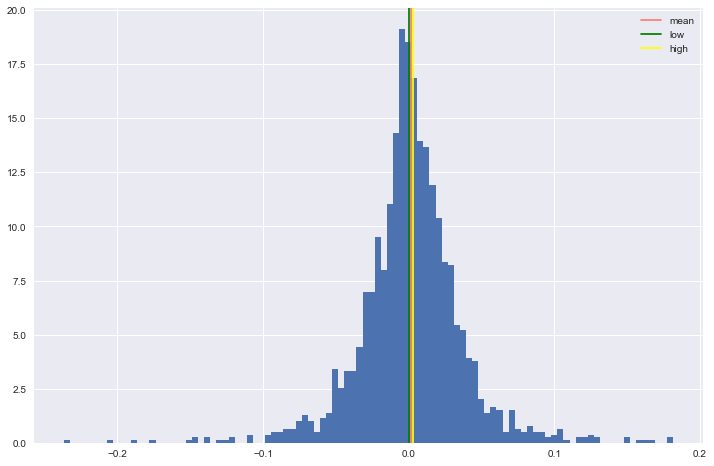

In [44]:
fig = plt.figure(figsize=(12, 8))

log_returns['TSLA'].hist(bins=100, density=True)

plt.axvline(mu, label='mean', color='salmon')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='yellow')
plt.legend()

plt.show()

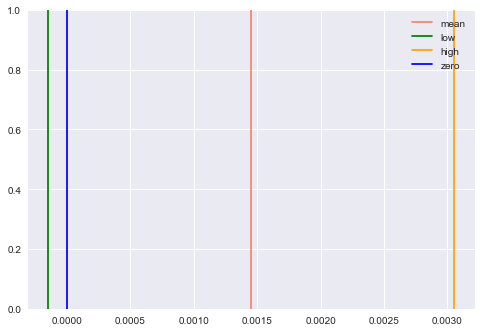

In [45]:
plt.axvline(mu, label='mean', color='salmon')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='orange')
plt.axvline(0, label='zero', color='blue')
plt.legend()

plt.show()

## Statistical Testing

In [46]:
from scipy.stats import jarque_bera, normaltest

In [47]:
# array of tsla log returns
values

array([-0.0429502 ,  0.00564823, -0.00156317, ..., -0.01810007,
       -0.01773551,  0.01235248])

In [48]:
# p-value-we reject the null hypothesis that this data comes from normal distribution 
jarque_bera(values)

Jarque_beraResult(statistic=2142.1588773750655, pvalue=0.0)

In [49]:
normaltest(values)

NormaltestResult(statistic=228.31534676721375, pvalue=2.6421190511896975e-50)

In [50]:
jarque_bera(tsla)

Jarque_beraResult(statistic=2142.1588773750655, pvalue=0.0)

In [51]:
normaltest(tsla)

NormaltestResult(statistic=228.31534676721375, pvalue=2.6421190511896975e-50)

In [52]:
from scipy.stats import kstest

In [53]:
df, loc, scale = t.fit(values)

def cdf(x):
    return t.cdf(x, df, loc, scale)

kstest(values, cdf)

KstestResult(statistic=0.018630617484265644, pvalue=0.5229642933574404)

In [54]:
# one sample t-test
from scipy.stats import ttest_1samp

In [55]:
ttest_1samp(values, 0)

Ttest_1sampResult(statistic=1.7800917551898652, pvalue=0.07522190583582893)

### Covariance and Correlation

In [56]:
log_returns.head()

,ACHC,AMD,ATVI,BRK-B,DHI,LPI,SPY,TSLA,V
Date,,,,,,,,,
2015-01-05,-0.014442,-0.003752,-0.014007,-0.014654,-0.021053,-0.151250,-0.018225,-0.042950,-0.022321
2015-01-06,-0.015856,-0.011342,-0.018816,-0.001089,-0.013594,-0.106903,-0.009464,0.005648,-0.006464
2015-01-07,0.041076,-0.019195,-0.021796,0.013797,0.050152,-0.013150,0.012384,-0.001563,0.013309
2015-01-08,0.018466,0.011561,0.009919,0.016586,0.022622,0.083093,0.017590,-0.001566,0.013324
2015-01-09,0.000162,0.007634,-0.018349,-0.012631,0.005001,0.040157,-0.008046,-0.018981,-0.014934


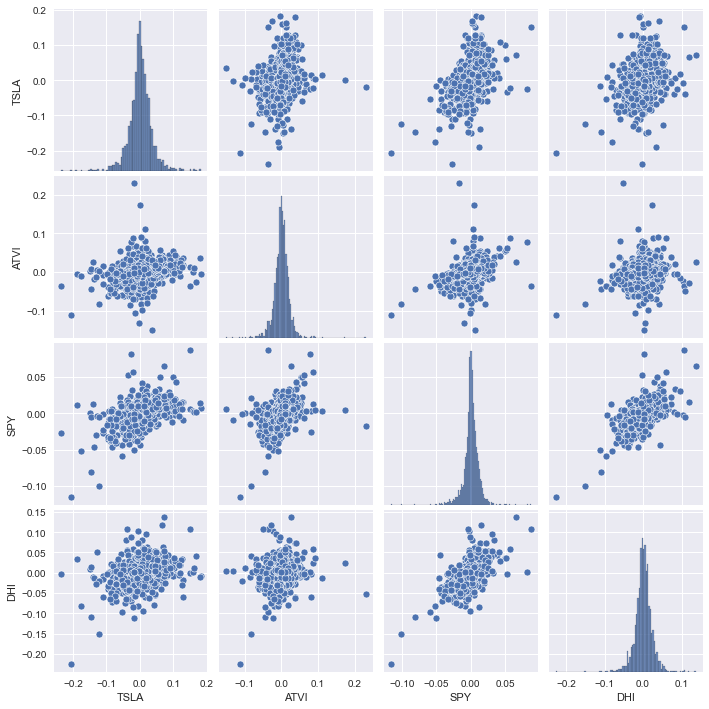

In [57]:
sns.pairplot(log_returns[['TSLA', 'ATVI', 'SPY', 'DHI']])

In [58]:
log_returns.corr()

,ACHC,AMD,ATVI,BRK-B,DHI,LPI,SPY,TSLA,V
ACHC,1.000000,0.221119,0.174987,0.393809,0.365165,0.261321,0.494608,0.235833,0.384510
AMD,0.221119,1.000000,0.286214,0.311295,0.296514,0.218257,0.482891,0.340646,0.372308
ATVI,0.174987,0.286214,1.000000,0.274164,0.224591,0.143947,0.435019,0.251425,0.391650
BRK-B,0.393809,0.311295,0.274164,1.000000,0.450892,0.395223,0.812382,0.275881,0.651548
DHI,0.365165,0.296514,0.224591,0.450892,1.000000,0.243998,0.604804,0.281161,0.476256
LPI,0.261321,0.218257,0.143947,0.395223,0.243998,1.000000,0.440523,0.198807,0.310847
SPY,0.494608,0.482891,0.435019,0.812382,0.604804,0.440523,1.000000,0.466786,0.797364
TSLA,0.235833,0.340646,0.251425,0.275881,0.281161,0.198807,0.466786,1.000000,0.364894
V,0.384510,0.372308,0.391650,0.651548,0.476256,0.310847,0.797364,0.364894,1.000000


<AxesSubplot:>

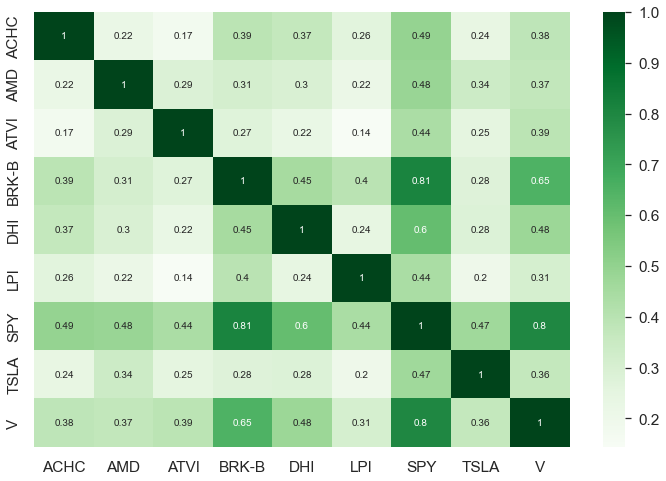

In [59]:
plt.figure(figsize=(12, 8))

sns.set(font_scale=1.4)
sns.heatmap(log_returns.corr(), cmap='Greens', annot=True, annot_kws={'size':10})


Visa and BRK-B have a high correlation with the market(SPY)
In general our assests are not highly positive correlated.

#### Alpha and Beta
Using returns of the market and a stock.

Ex: if B=2, then if SPY(market) increases by 1%, Tesla increases by 2% 
    
    If SPY decreases by 5%, Tesla decreases by 10%
    
- Alpha is how much better is the stock in terms of performance relative to market
     
        Alpha > 0: Tesla has outperformed the market
        Conceptually we will want high alpha stocks

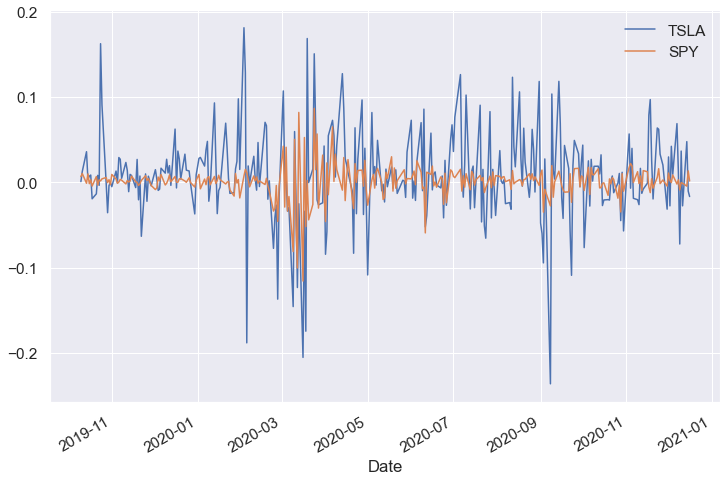

In [80]:
# change index loc(iloc) to plot different dates
log_returns[['TSLA', 'SPY']].iloc[1200:1500].plot(figsize=(12, 8));

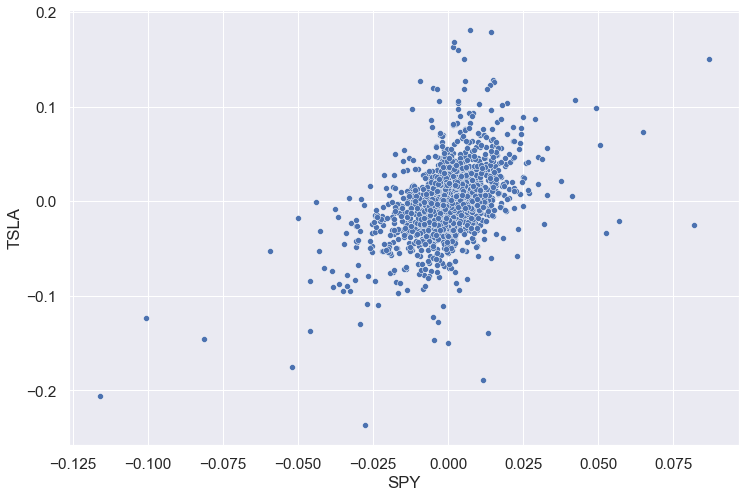

In [61]:
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(data=log_returns, x='SPY', y='TSLA')

plt.show();

In [62]:
# make dataset for LR
X = log_returns[['SPY']].to_numpy()
Y = log_returns[['TSLA']].to_numpy()

In [63]:
X.shape, Y.shape

((1887, 1), (1887, 1))

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [66]:
np.linspace(X.min(), X.max(), 5).reshape(-1,1)

array([[-0.11588644],
       [-0.06523209],
       [-0.01457775],
       [ 0.03607659],
       [ 0.08673094]])

In [67]:
X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1,1)
Y_predict = model.predict(X_predict)

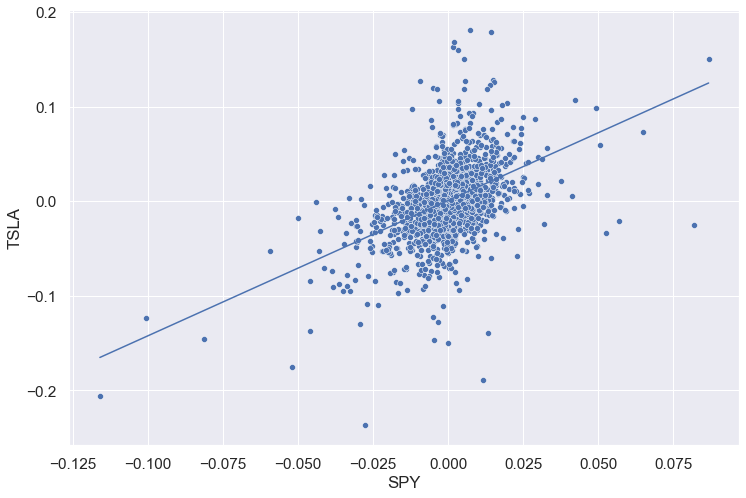

In [68]:
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(data=log_returns, x='SPY', y='TSLA')

plt.plot(X_predict, Y_predict)
plt.show();

In [89]:
beta = model.coef_
alpha = model.intercept_

print(f'Tesla alpha: {alpha[0]}\nTesla beta: {beta[0][0]}')

Tesla alpha: 0.0008802851159998181
Tesla beta: 1.4320107774135364
